In the following the global games sales are analyzed, with special attention to sales
in the North America European and Japanese markets.

In the analysis, we will try to answer three questions:

1. what are some major differences between the North American, European, and Japanese video game markets?
2. what video game genres are trending in each market?
3. what features about a video game are most indicative of its success?

**Methodology**

The differences in the three markets will be assessed by visual inspection of the Platform,
Genre and Publisher trends, both in the years and cumulatively. Plotting the Genre trends in the years
will also answer the question relative to trending generes in each market.

Finally, the features important for conversion will be determined by modeling
the data with an XGBoost regressor and extracting its important features.


We start by importing the dataset and performing a preliminary EDA with pandas profiling.

In [119]:
import pandas as pd
vgsales_i = pd.read_csv('vgsales.txt')
print(vgsales_i.head())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(vgsales_i, title='Pandas Profiling Report')
profile.to_file(output_file='vgsales.html')

From the profile, very few data points are missing in two columns: Year and Publisher.
Also, the American market presents data as recent as 2020. For a fair comparison, the data points
collected after 2016 are discarded.
For the time being, the rows that present empty values are discarded: these rows only constitute the 0.3% of the
whole dataframe.

In [126]:
vgsales_i = vgsales_i[vgsales_i['Year']<= 2016]

In [127]:
vgsales = vgsales_i.dropna()
print(round(len(vgsales)*100/len(vgsales_i), 3))


99.779


**What are some major differences between the North American, European, and Japanese video game markets?**

In order to assess differences in the three markets, three dataframes are created for each of the markets.

In [128]:
vgsales_NA = vgsales[vgsales['NA_Sales']!= 0]
vgsales_EU = vgsales[vgsales['EU_Sales']!= 0]
vgsales_JP = vgsales[vgsales['JP_Sales']!= 0]

print(len(vgsales_NA))
print(len(vgsales_EU))
print(len(vgsales_JP))

11860
10667
6081


In [122]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-white')

The following functions respectively transform the dataframe of interest, grouping it by the parameter (for example,
Publisher, Genre or Platform), that we want to analyze, and plot the parameter's different categories in time.

It is possible to provide a list of parameter's categories that it is worth looking into: sometimes, in fact, the number of categories
is high and plotting all of them would not provide a satisfactory or clear insight in the trend. When this happens,
the criteria to chose the categories will be specified.

It would be interesting to select the top ten categories for each market. However the scope of this notebook is the comparison of
categories across the three markets, therefore it is easy to justify the use of the same, most frequent, categories across the three.

In [20]:
def df_transform(df, col, time_col):
    df_out = df.groupby([time_col,col])['Name'].count()
    df_out = df_out.reset_index()
    df_out['count'] = df_out['Name']
    df_out.drop(columns=['Name'], inplace = True)
    return df_out

In [163]:
def plot_trends(df, col, time_col, lst=None):
    if lst is None:
        df=df
    else:
        lst = lst
        df = df[df[col].isin(lst)]

    fig, ax = plt.subplots()
    colormap = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan',
                'lime', 'darkorange', 'coral']
    cnt = 0
    for key, data in df.groupby(col):
        cnt += 1
        data.plot(x=time_col, y='count',ax = ax, label=key, rot = 90, color = colormap[cnt])
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
          fancybox=True, shadow=True, ncol=5)
    plt.show()

*Platform Analysis*

First, an histogram is produced to analyze the usage of different platforms across the three markets of interest.

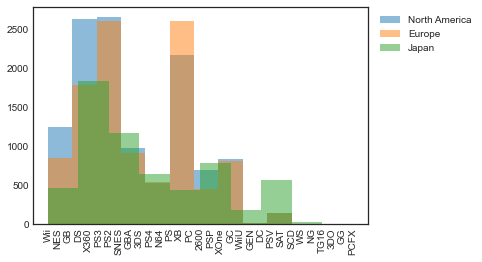

In [185]:
plt.hist(vgsales_NA['Platform'], alpha=0.5, label="North America")
plt.hist(vgsales_EU['Platform'], alpha=0.5, label="Europe")
plt.hist(vgsales_JP['Platform'], alpha=0.5, label="Japan")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation='vertical')
plt.show()

The overall most popular Platforms are the same in the European and the North American markets:
DS, X360, PS3 (mostly in the North American market), PS2, SNES, XB and PC in common with the European markets.
In the Japanese market, X360, PS3 and PS2 are the most popular Platforms cumulatively.

Then, the platforms that account for more than 80% of the column's data (as per pandas profiling outcome) are retained,
 and the trend of their usage is displayed in time, for each of the three markets.

In [130]:
lst_platforms = ['DS',
'PS2',
'PS3',
'Wii',
'X360',
'PSP',
'PS',
'PC',
'XB',
'GBA']

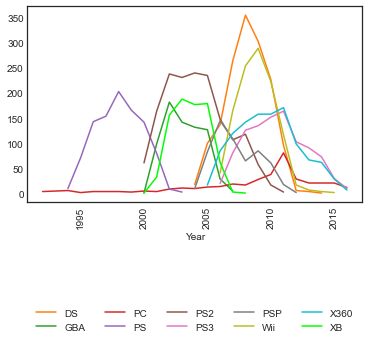

In [164]:
NA = df_transform(vgsales_NA, 'Platform', 'Year')
plot_trends(NA, 'Platform', 'Year', lst=lst_platforms)

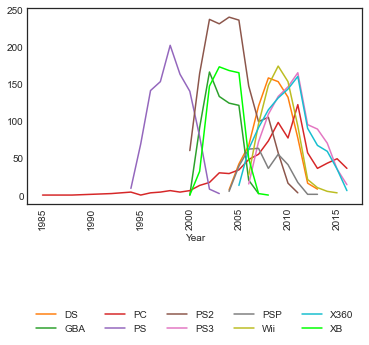

In [165]:
EU = df_transform(vgsales_EU, 'Platform', 'Year')
plot_trends(EU, 'Platform', 'Year', lst=lst_platforms)

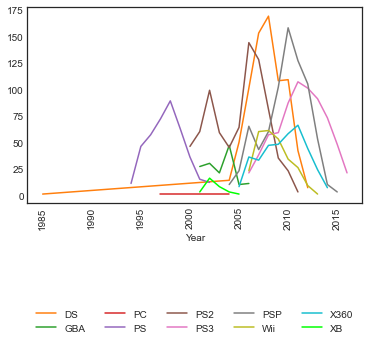

In [166]:
JP = df_transform(vgsales_JP, 'Platform', 'Year')
plot_trends(JP, 'Platform', 'Year', lst=lst_platforms)

PS and PS2 have a similar trend across all the three markets, although
the European market seems to follow the other two with a delay of five years.
After 2005 DS was the most popular in North American and Japan, followed by PS3. In Europe,
on the other hand, DS, Wii, PS3, PC and X360 were all popular. Generally, all the trends are decreasing,
suggesting possible lack of complete data in the period after 2015.


*Publisher Analysis*

There are almost 600 Publisher categories. The most popular accounts for only 8% of the total data, meaning that there are plenty
of publishers that appear just once across the whole dataset.

The following list contains the publishers that account for 50% of the whole column: the highest frequency
is the publisher 'Electonic Arts' and the lowest in the publisher 'Take-Two Interactive', which appears 2.5% of the times.
This confirms that the other publishers, despite being over 500, have less than 3% frequency, and can be discarded at this stage.

In [134]:
lst_publisher = ['Electronic Arts',
'Activision',
'Namco Bandai Games',
'Ubisoft',
'Konami Digital Entertainment',
'THQ',
'Nintendo',
'Sony Computer Entertainment',
'Sega',
'Take-Two Interactive']

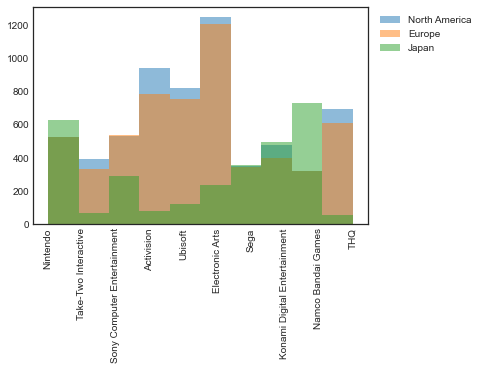

In [184]:
NA_publ = vgsales_NA[vgsales_NA['Publisher'].isin(lst_publisher)]
EU_publ = vgsales_EU[vgsales_EU['Publisher'].isin(lst_publisher)]
JP_publ = vgsales_JP[vgsales_JP['Publisher'].isin(lst_publisher)]

plt.hist(NA_publ['Publisher'], alpha=0.5, label="North America")
plt.hist(EU_publ['Publisher'], alpha=0.5, label="Europe")
plt.hist(JP_publ['Publisher'], alpha=0.5, label="Japan")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation='vertical')
plt.show()

While Nintendo seems popular across all the three markets, Activision, Ubisoft and Electronic Arts are very popular
in Europe and North America, while Sega and Konami dominate the Japanese market.

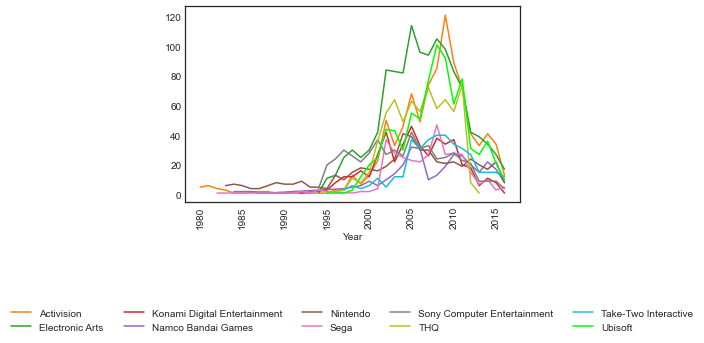

In [167]:
NA = df_transform(vgsales_NA, 'Publisher', 'Year')
plot_trends(NA, 'Publisher', 'Year', lst = lst_publisher)

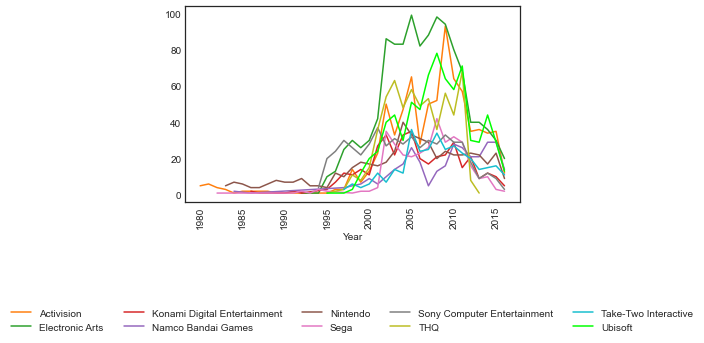

In [168]:
EU = df_transform(vgsales_EU, 'Publisher', 'Year')
plot_trends(EU, 'Publisher', 'Year', lst = lst_publisher)

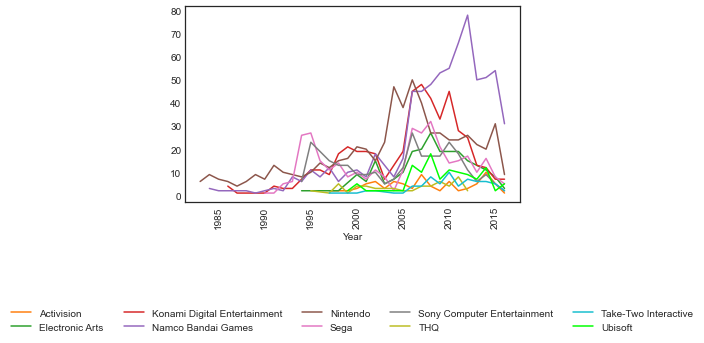

In [169]:
JP = df_transform(vgsales_JP, 'Publisher', 'Year')
plot_trends(JP, 'Publisher', 'Year', lst = lst_publisher)


The Publisher popularity trends of Europe and North America are basically the same: Electronic Arts, Activision and Ubisoft appear dominant, especially
between 2000 and 2015. The Japanese market, on the other hand saw a surge in Namco Bandai Games from 2015 on, with Konami and Nintendo
slowly decreasing.


**What video game genres are trending in each market?**

*Genre Analysis*

As before, an histogram is used to display the Genre's popularity across the three markets, without considering
the popularity in time.

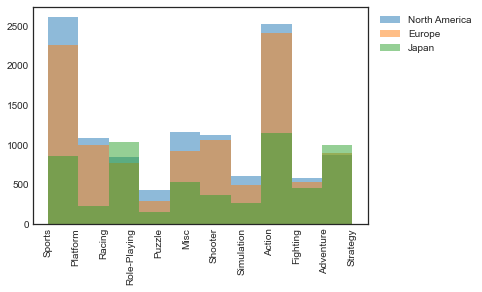

In [183]:
plt.hist(vgsales_NA['Genre'], alpha=0.5, label="North America")
plt.hist(vgsales_EU['Genre'], alpha=0.5, label="Europe")
plt.hist(vgsales_JP['Genre'], alpha=0.5, label="Japan")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation='vertical')
plt.show()

The trend of all the Generes across the years is displayed in the following plots.


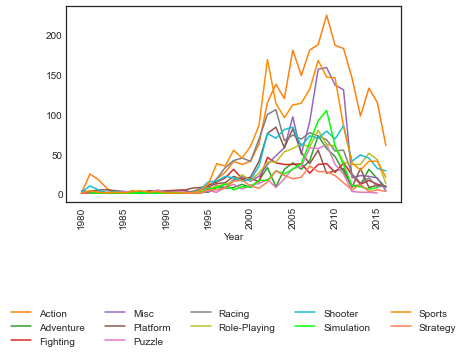

In [170]:
NA = df_transform(vgsales_NA, 'Genre', 'Year')
plot_trends(NA, 'Genre', 'Year')

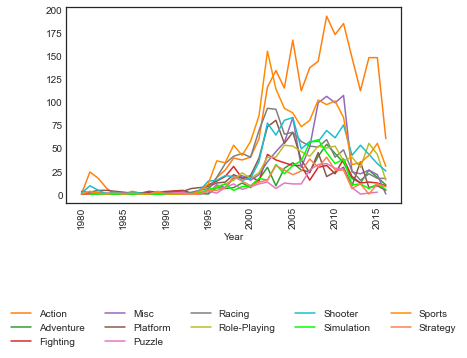

In [171]:
EU = df_transform(vgsales_EU, 'Genre', 'Year')
plot_trends(EU, 'Genre', 'Year')

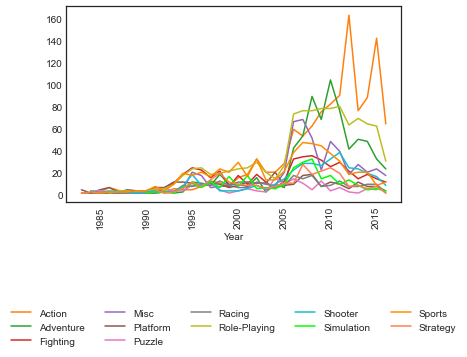

In [172]:
JP = df_transform(vgsales_JP, 'Genre', 'Year')
plot_trends(JP, 'Genre', 'Year')



**What features about a video game are most indicative of its success?**

The dataset will be modeled using an XGBoost regressor, and the features deemed important in the regression
will be considered factors that drive sales, and therefore features indicative of the video game success.

Only the name of the videogame is excluded in the modeling. The categorical features are one-hot-encoded.

The XGBoost regressor does not require feature scaling, is not as sensitive to feature multicollinearity as a linear
regressor, is fast to train and is robust to sparse data: our data will be sparse as a consequence of one-hot encoding.
For these reasons the XGBoost regressor is chosen for the analysis.

The model performance will be evaluated using negative MAE (therefore, the closest to 0 the better the fit) and
will be validated using 5-fold cross validation.

Because the point of the analysis is to provide important features for sales, not predicting sales, the dataset will
not be divided in test and train sets.

In [67]:
df_sales = vgsales[['Platform',  'Genre', 'Publisher','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']]

In [82]:
# split data into X and y
to_encode = ['Platform',  'Genre', 'Publisher']

In [87]:
df = pd.get_dummies(data=df_sales,columns=to_encode)

In [108]:
#https://github.com/dmlc/xgboost/issues/357
from  xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = df.drop(columns = ['Global_Sales'])
Y = df['Global_Sales']
# fit model no training data
model = XGBRegressor()
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(model, X, Y, cv=5, scoring = 'neg_mean_absolute_error')
print("Negative MAE: %.2f" % (results.mean()))

/Users/chiara/opt/anaconda3/envs/vgsales/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


MAE: -30.70%


In [111]:
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
sorted_idx = model.feature_importances_.argsort()
sorted_idx=sorted_idx[-15:]

The following plot reports the feature important for sales, sorted by importance.

Text(0.5, 0, 'Xgboost Feature Importance')

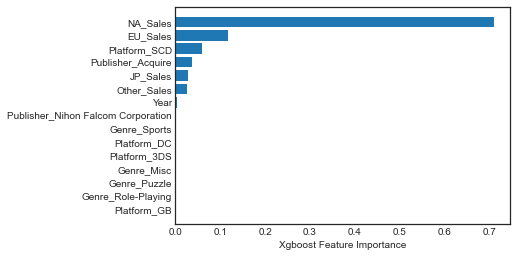

In [113]:
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")



It seems that the sales in the North American market and the European market are drivers for the global sales of a game.
Also, the platform SCD and the publisher Acquire seem to be key in the sales of a game. Sales in the Japanese market and
other markets are less important.

To rule out any potential distortion of the model due to the numerical values of the non-categorical features,
an iteration of the same model is performed excluding all the numerical variables (but total sales) from the data set - the analysis can be
found in the following appendix.
As the MAE error on the model is far worse than the model that accounts for the numerical features, it is clear that their
actual values do not erroneously drive the model.

**Conclusions**

The feature importance can be evaluated with Shap or features permutation, given time.


***Appendix***

What happens when the most relevant features are removed from the model?

The MAE score doubles, suggesting that the model has lost predictive power.

In [114]:
X = df.drop(columns = ['Global_Sales','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'])
Y = df['Global_Sales']
test_size = 0.33
# fit model no training data
model = XGBRegressor()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=5, scoring = 'neg_mean_absolute_error')
print("Negative MAE: %.2f" % (results.mean()))

/Users/chiara/opt/anaconda3/envs/vgsales/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


MAE: -0.64


In [115]:
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
sorted_idx = model.feature_importances_.argsort()
sorted_idx=sorted_idx[-15:]

Text(0.5, 0, 'Xgboost Feature Importance')

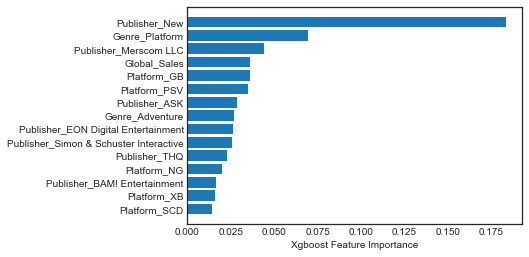

In [117]:
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")